<a href="https://colab.research.google.com/github/bsikdar1986/IISc_Assignment/blob/main/Brindaban_M8_NB_MiniProject_2_EDA_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Exploratory Data Analysis - Timeseries

## Problem Statement

Perform Exploratory Data Analysis (EDA) of Retail Sales time series data using visualizations and statistical methods.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform Exploratory data analysis (EDA) of the time series
* perform Time series behaviour analysis in qualitative and quantitative terms
* summarize the findings based on the EDA

## Dataset

The dataset is a French retail company quarterly sales data that has been made available from  Prof. Rob Hyndman's ["Forecasting Methods & Applications"](https://robjhyndman.com/forecasting/) book. There are 24 entries, from 2012-03-31 to 2017-12-31 (Quarterly sales values).

## Introduction

Exploratory data analysis of time series data starts with data visualization.

- Are there consistent patterns?
- Is there a significant trend?
- Is seasonality important?
- Is there evidence of the presence of business cycles?
- Are there any outliers in the data that need to be explained by those with expert knowledge?
- How strong are the relationships among the variables available for analysis?

Various tools have been developed to help with these analyses.

## Grading = 10 Points

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/ts_frenchretail.csv

### Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-white')
%matplotlib inline
import scipy
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

### Import the Data

In [ ]:
# Read dataset with 'Date' as index
df = pd.read_csv('/content/ts_frenchretail.csv', parse_dates=['Date'], index_col='Date')

# Confirm the import
df.head()

,Sales
Date,
2012-03-31,362000
2012-06-30,385000
2012-09-30,432000
2012-12-31,341000
2013-03-31,382000


## Exploratory Data Analysis

### **Preprocessing** (1 point)

#### Divide the sales by 1000

Sales numbers are in thousands, so divide by 1000 to make it easier to work with numbers

In [ ]:
df['Sales'] = df['Sales'] / 1000

# Display the first few rows to confirm the change
df.head()

,Sales
Date,
2012-03-31,362.0
2012-06-30,385.0
2012-09-30,432.0
2012-12-31,341.0
2013-03-31,382.0


#### Check for missing values     

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Sales    0
dtype: int64


### **Visualization**

#### Visualize the time series (2012 to 2017) (1 point)

In [ ]:
# Data for the time period 2012 to 2017
df_filtered = df['2012-01-01':'2017-12-31']
df_filtered

,Sales
Date,
2012-03-31,362.0
2012-06-30,385.0
2012-09-30,432.0
2012-12-31,341.0
2013-03-31,382.0
2013-06-30,409.0
2013-09-30,498.0
2013-12-31,387.0
2014-03-31,473.0


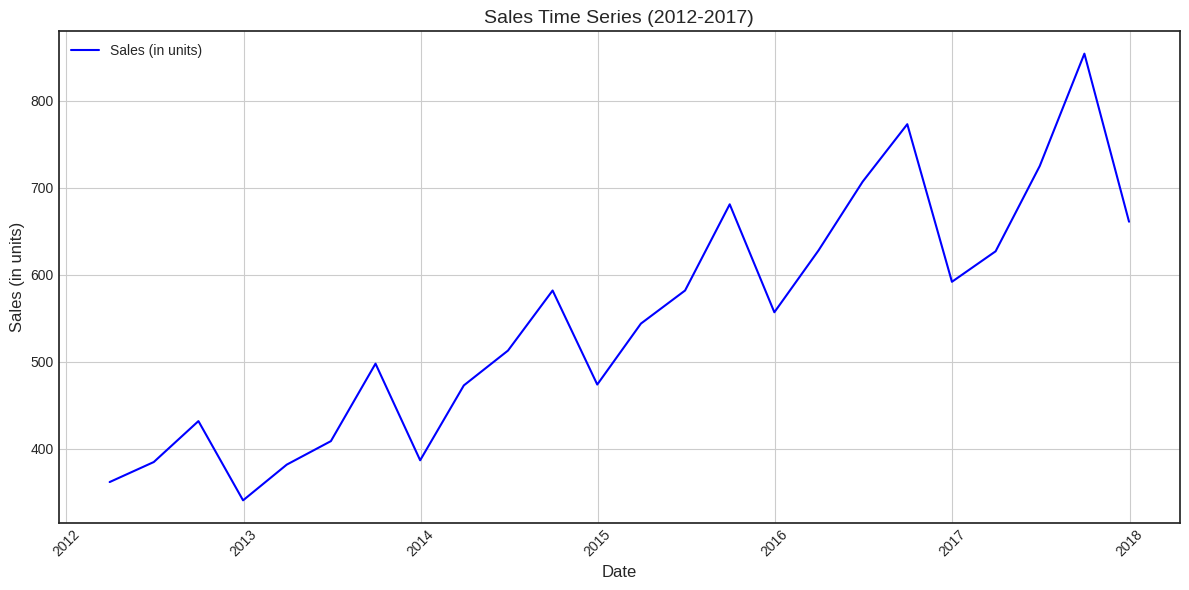

In [ ]:
# Time series
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Sales'], label='Sales (in units)', color='blue')
plt.title('Sales Time Series (2012-2017)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales (in units)', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Visualize the data year-wise and quarter-wise (2 points)

- Box plot to see distribution of sales in each year
- Create year-wise subplots to visualize the quarterly Sales per year
- Compute Percentage growth each year

Make a report of your observations.

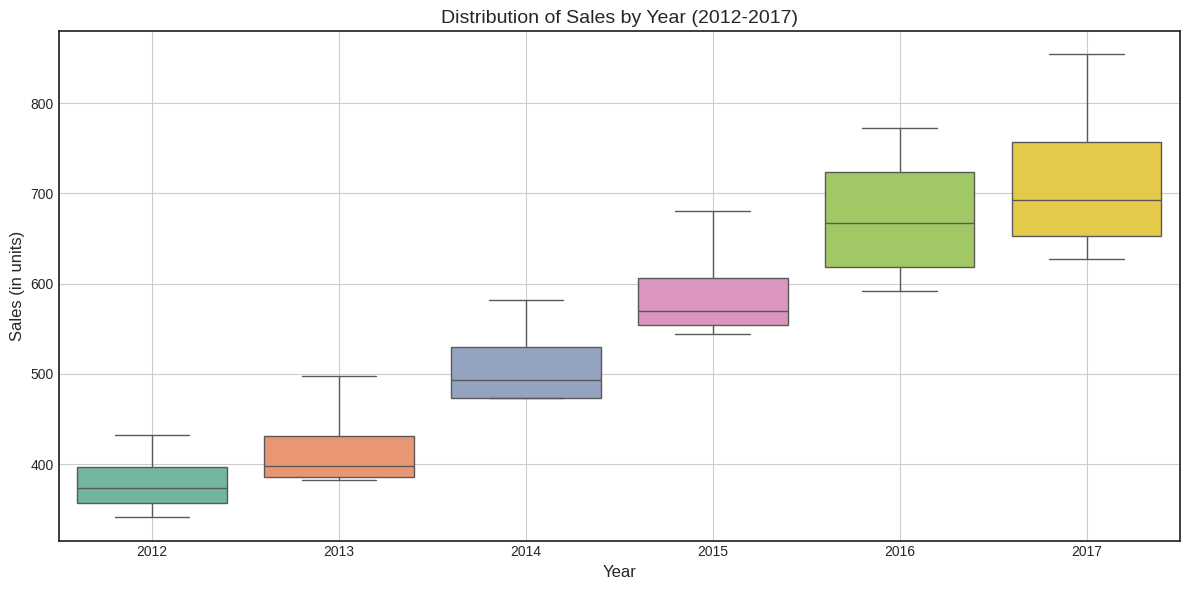

In [ ]:
# Extract the year from the index and create a 'Year' column
df_filtered['Year'] = df_filtered.index.year

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Sales', data=df_filtered, palette='Set2')

# Customize the plot
plt.title('Distribution of Sales by Year (2012-2017)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (in units)', fontsize=12)
plt.grid(True)
plt.tight_layout()

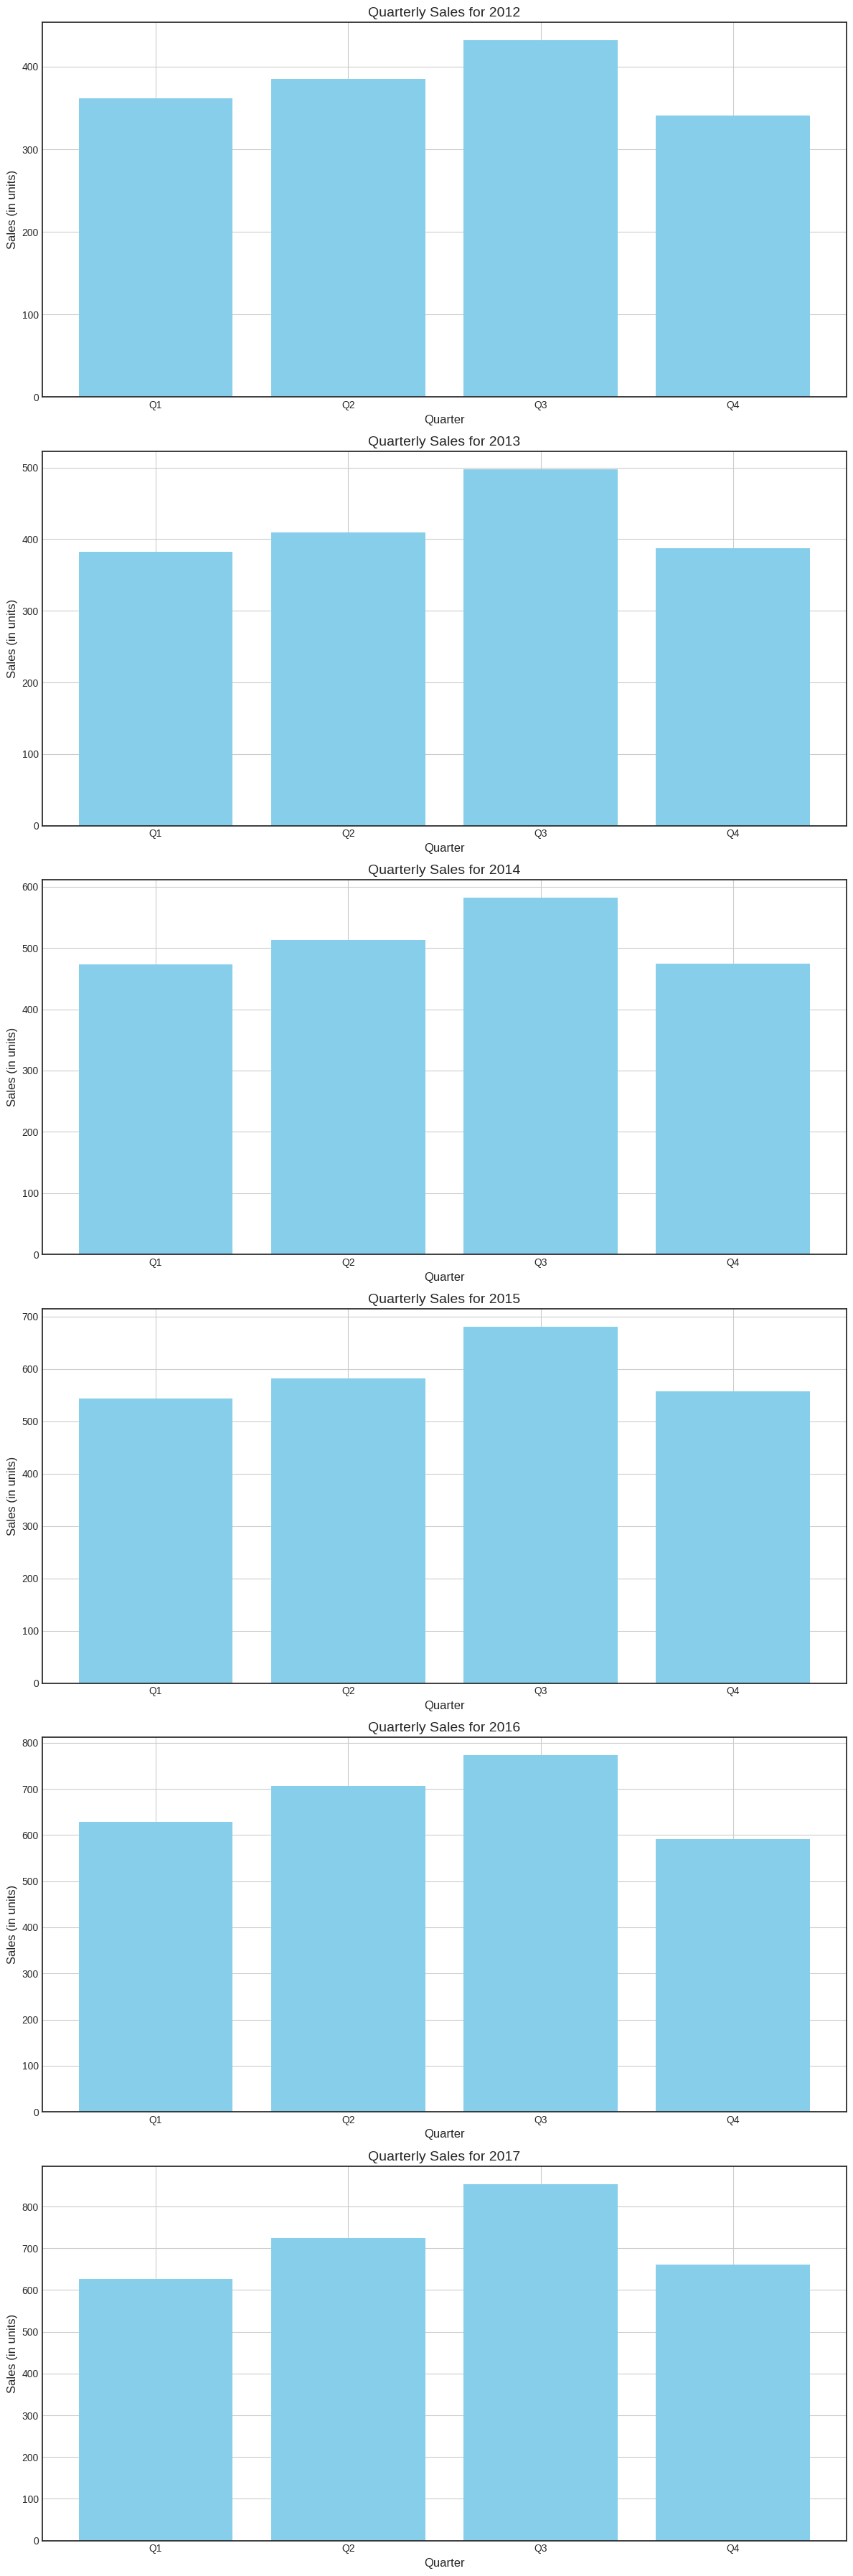

In [ ]:
# Year-wise subplots to visualize the quarterly Sales per year
# Extract the quarter from the index
df_filtered['Quarter'] = df_filtered.index.quarter

# Multiple subplots (one per year)
years = df_filtered['Year'].unique()
n_years = len(years)

# Set up the subplots (one row for each year)
fig, axes = plt.subplots(n_years, 1, figsize=(12, 6 * n_years))

# For each year, quarterly sales
for i, year in enumerate(years):
    # Data for the current year
    year_data = df_filtered[df_filtered['Year'] == year]
    # Sales by quarter for the current year
    quarterly_sales = year_data.groupby('Quarter')['Sales'].sum()

    # Quarterly sales for the current year
    axes[i].bar(quarterly_sales.index, quarterly_sales, color='skyblue')
    axes[i].set_title(f'Quarterly Sales for {year}', fontsize=14)
    axes[i].set_xlabel('Quarter', fontsize=12)
    axes[i].set_ylabel('Sales (in units)', fontsize=12)
    axes[i].set_xticks([1, 2, 3, 4])  # quarters
    axes[i].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
    axes[i].grid(True)

plt.tight_layout()

plt.show()

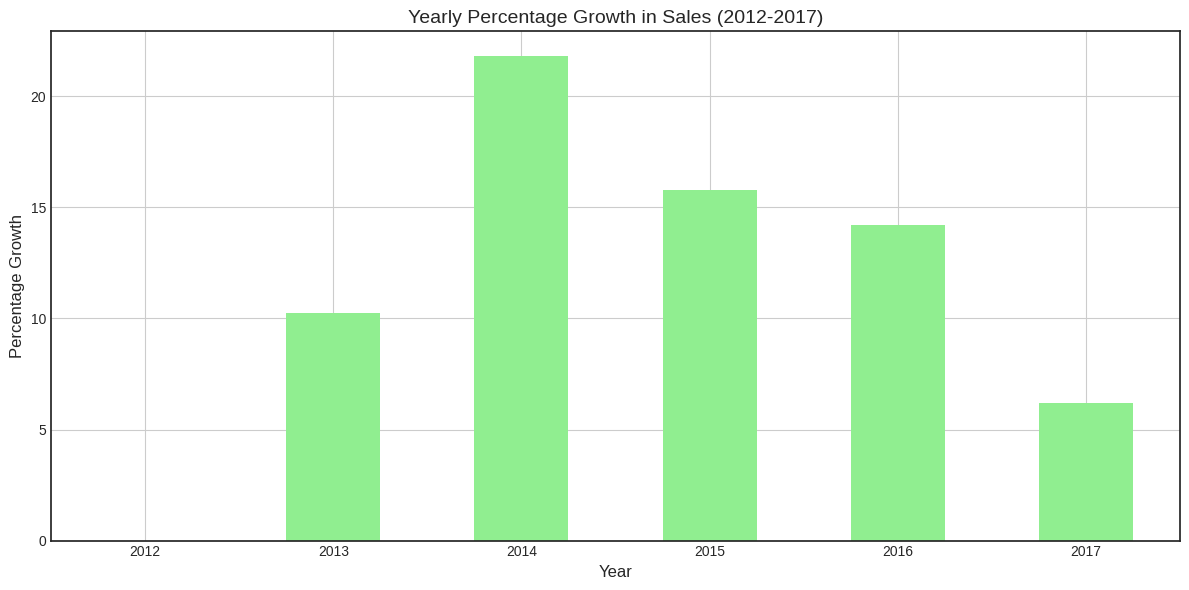

Year
2012          NaN
2013    10.263158
2014    21.837709
2015    15.768854
2016    14.213198
2017     6.185185
Name: Sales, dtype: float64


In [ ]:
# Percentage growth each year
# Total sales for each year
annual_sales = df_filtered.groupby('Year')['Sales'].sum()

# Percentage growth for each year compared to the previous year
percentage_growth = annual_sales.pct_change() * 100

# Plot
plt.figure(figsize=(12, 6))
percentage_growth.plot(kind='bar', color='lightgreen')


plt.title('Yearly Percentage Growth in Sales (2012-2017)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Growth', fontsize=12)
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()


plt.show()

# The percentage growth values
print(percentage_growth)

#### Visualize the distribution of the Sales (0.5 point)

While normally distributed data is not a requirement for forecasting and doesn't necessarily improve point forecast accuracy, it can help stablize the variance and narrow the prediction interval.

Report your observations.

Hint: `sns.distplot()`

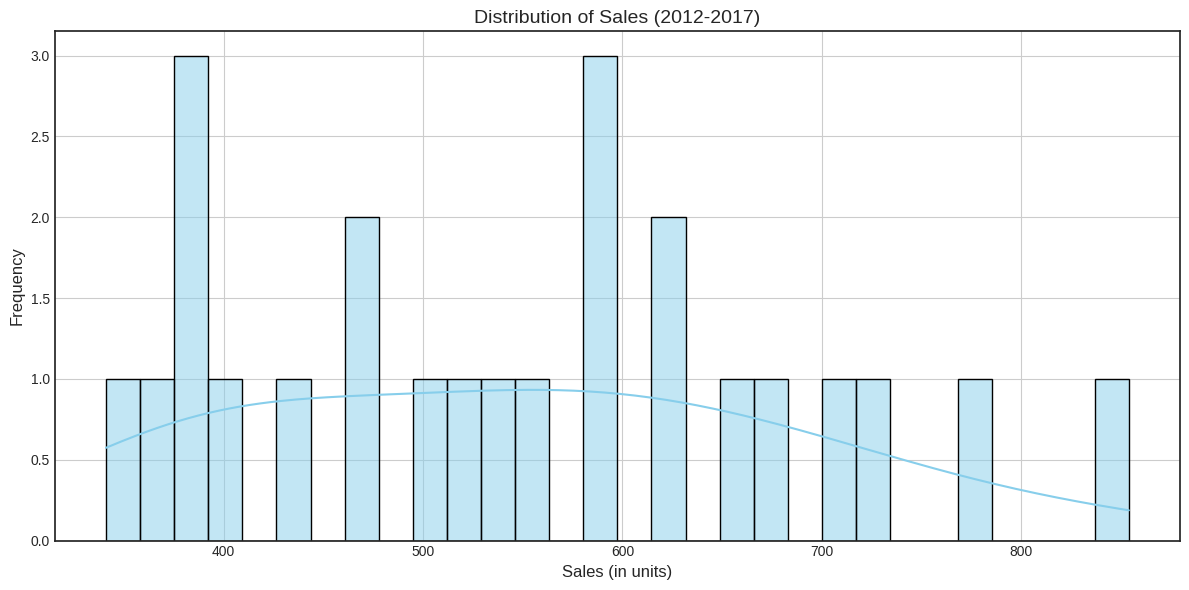

In [ ]:
# Distribution plot for sales data
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], kde=True, color='skyblue', bins=30)

plt.title('Distribution of Sales (2012-2017)', fontsize=14)
plt.xlabel('Sales (in units)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()

#### Visualize Quarterly trends (1 point)

Create quarterly subplots to visualize the data in each quarter across all years

Hint: statsmodels' `quarter_plot()` method

<Figure size 1200x800 with 0 Axes>

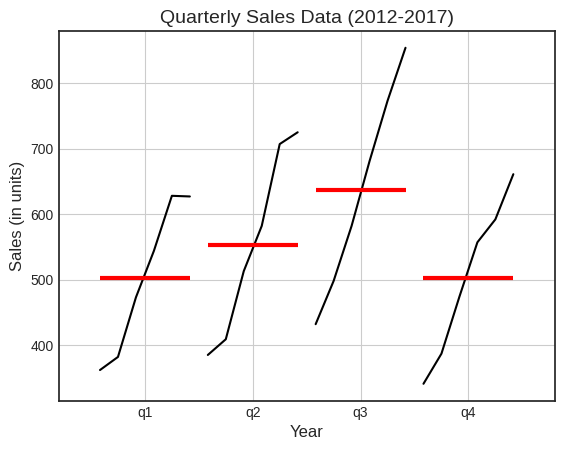

In [ ]:
plt.figure(figsize=(12, 8))

# Quarter_plot function to plot sales data across all quarters
quarter_plot(df_filtered['Sales'])

plt.title('Quarterly Sales Data (2012-2017)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (in units)', fontsize=12)
plt.grid(True)

plt.show()

#### Visualize the distribution of Sales in each year within a single plot (1 point)

- Do the distribution peaks shift to the right from 2012 to 2017? What does this indicate?
- Is there a change in the width of the distributions from 2012 to 2017? What does it signify?

Hint: `sns.distplot(hist=False)`

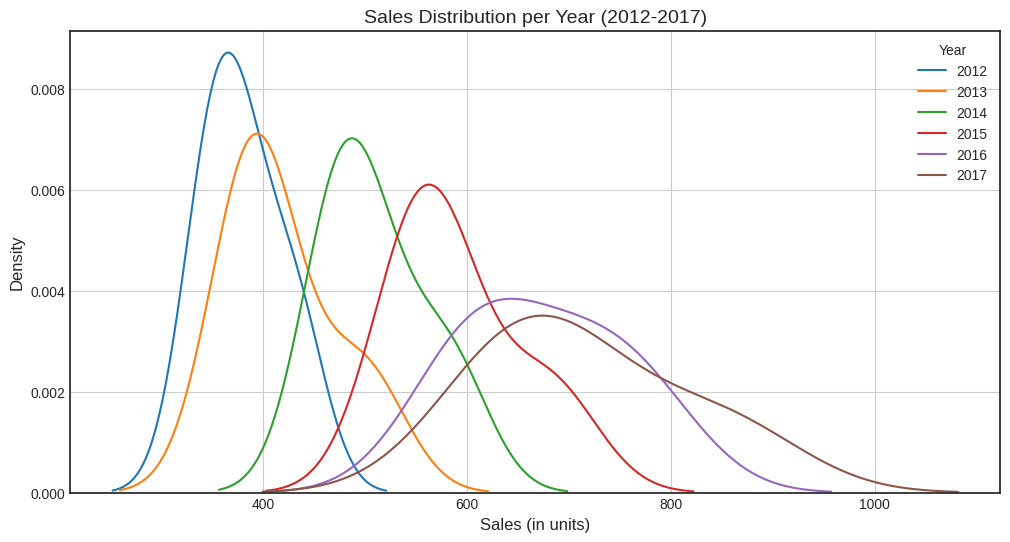

In [ ]:
plt.figure(figsize=(12, 6))

# Iterate for each year
years = df_filtered['Year'].unique()
for i in years:
    year_data = df_filtered[df_filtered['Year'] == i]
    # Distplot for the current year's sales
    sns.distplot(year_data['Sales'], label=str(i), hist=False)

plt.title('Sales Distribution per Year (2012-2017)', fontsize=14)
plt.xlabel('Sales (in units)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.show()

**Shift in Peaks:**

The peaks of the distribution curves shift to the right over time (from 2012 to 2017), it indicates that the sales are generally increasing each year.

**Change in Width of Distributions:**

The width of the distributions increases over time, it could indicate that the variability (or spread) of sales is widening. This might suggest that sales have become more volatile, with larger fluctuations between years.

#### Visualize the quarterly sales for each year using a stacked bar plot (1 point)

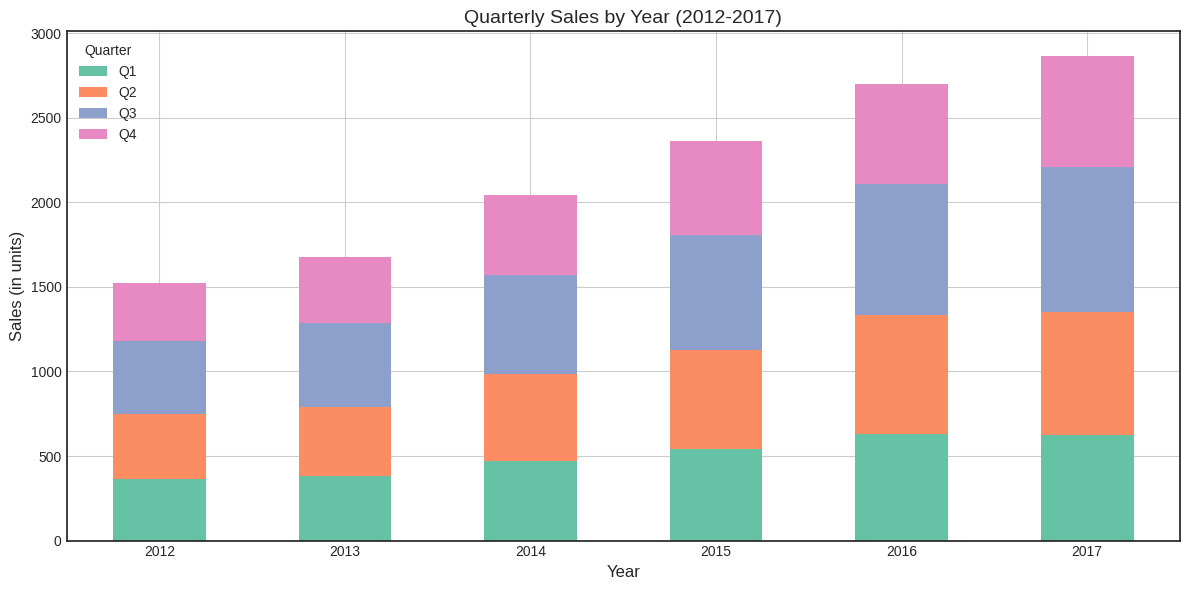

In [ ]:
# Sales by year and quarter
quarterly_sales = df_filtered.groupby(['Year', 'Quarter'])['Sales'].sum().unstack()

# The stacked bar plot
quarterly_sales.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette("Set2", 4))

plt.title('Quarterly Sales by Year (2012-2017)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (in units)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Quarter', labels=['Q1', 'Q2', 'Q3', 'Q4'], loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

#### Check if the time series data is stationary (1 point)

Hint:

For the series to be stationary, it must have:
 - constant mean
 - constant variance
 - constant covariance (uncorrelated)

Visualize if the mean is constant

Hint: [Rolling mean](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.mean.html)

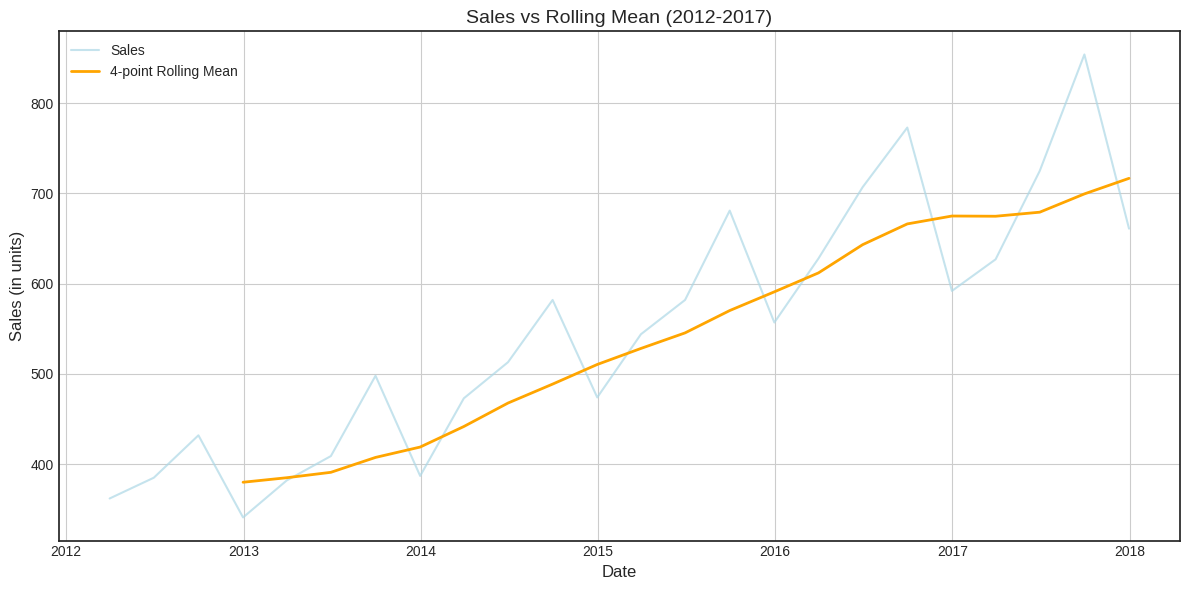

In [ ]:
# Define the rolling window size
window_size = 4

# Calculate the rolling mean for sales
df_filtered['Rolling_Mean'] = df_filtered['Sales'].rolling(window=window_size).mean()

# Plot the original sales data and the rolling mean
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Sales'], label='Sales', color='lightblue', alpha=0.7)
plt.plot(df_filtered.index, df_filtered['Rolling_Mean'], label=f'{window_size}-point Rolling Mean', color='orange', linewidth=2)


plt.title('Sales vs Rolling Mean (2012-2017)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales (in units)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.show()

Visualize if the variance is constant

Hint: [Rolling standard deviation](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.std.html)

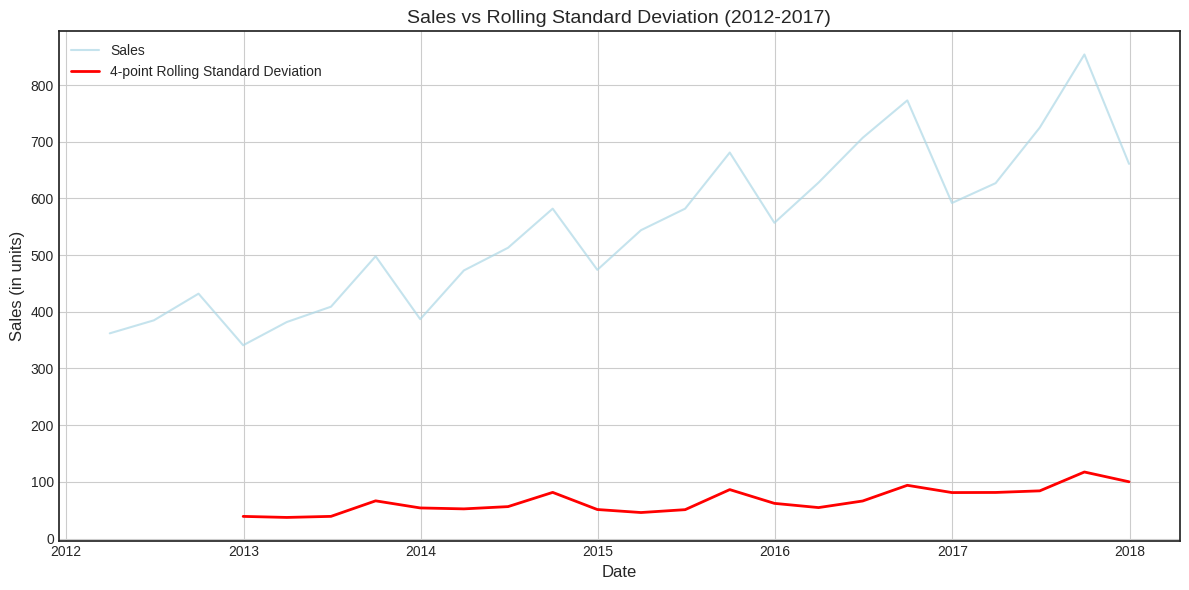

In [ ]:
# Rolling standard deviation
window_size = 4
df_filtered['Rolling_Std'] = df_filtered['Sales'].rolling(window=window_size).std()

plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Sales'], label='Sales', color='lightblue', alpha=0.7)
plt.plot(df_filtered.index, df_filtered['Rolling_Std'], label=f'{window_size}-point Rolling Standard Deviation', color='red', linewidth=2)

plt.title('Sales vs Rolling Standard Deviation (2012-2017)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales (in units)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Based on the observations report whether the series is stationary or not.

**Observation:** It's observed that the variability in the data does not change over time so the series can be considered stationary

#### Visualize the patterns in time series - trend, seasonality, residuals (1 point)

Hint: See Module 5 - AST2 EDA > Patterns in a time series

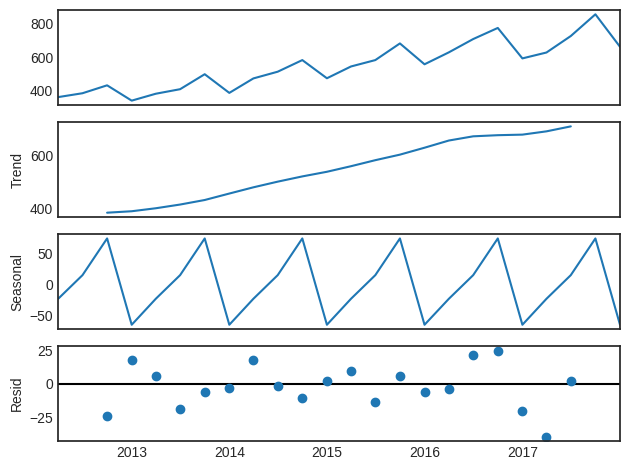

In [ ]:
# Applying seasonal decompose
result = seasonal_decompose(df, model='additive')

# Plotting trend, seasonality and both trend and seasonality
result.plot()
plt.show()

Report if there are any observable patterns in terms of trend, seasonality , or cyclic behavior.

***Observation:*** The time series is splitted into these components: Base Level + Trend + Seasonality + Error.

Trend Pattern: It is in Increasing pattern and mostly linear.

Seasonlity Pattern: Here Time series is affected by seasonal factors such as fixed calendar-based intervals. So the behaviour is Seasonal not specifcally Cyclic.

### **Detrending**

####  Detrend the time series (0.5 point)

Detrending a time series is to remove the trend component from a time series.

Hint:
- Subtract the line of best fit `scipy.signal.detrend()`

Text(0.5, 1.0, 'Sales detrended by subtracting the least squares fit')

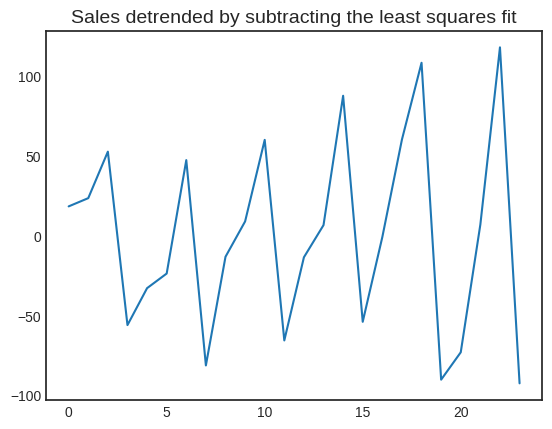

In [ ]:
# Subtract the line of best fit
detrended = signal.detrend(df.Sales.values)
plt.plot(detrended)
plt.title('Sales detrended by subtracting the least squares fit', fontsize=14)

### **Lag Plots** (Optional)

#### Visualize the Lag plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

For reference, see Module 5 - AST2 > Lag Plots

Hint: `pandas.plotting.lag_plot()`

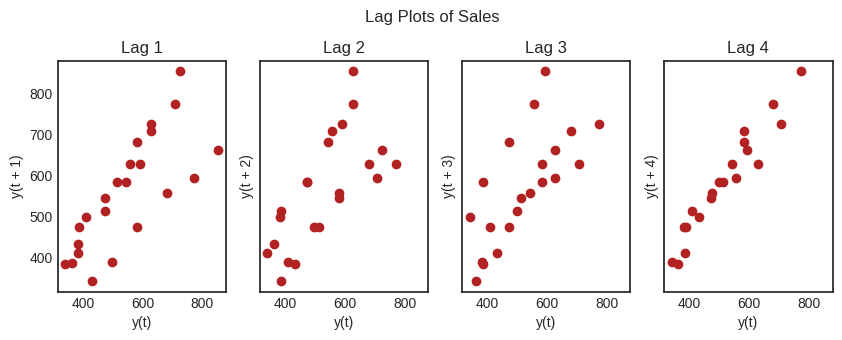

In [ ]:
# Visualize lag plots
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.Sales, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sales', y=1.05)
plt.show()

***Observation:*** There is increasing pattern existing in the Sales data, so we can comment that the Sales series is autocorrelated.

### Report Analysis

- Give the summary about this time series

***Summary: ***

The Sales data suggests a growing business with a steady upward trend in sales each year. However, the widening spread of the distribution curves signals that the sales are becoming more volatile, with larger fluctuations from year to year. Despite this, the data can be considered stationary with respect to variability, making it easier to model the trend and seasonality. A seasonal pattern is observed, with Q3 (the third quarter) consistently outperforming other quarters in each year. This indicates that sales are typically higher during the third quarter, possibly due to factors such as holiday seasons, promotions, or market demand in that specific period. The increasing pattern and no white noise in the data, even after detrending, it suggests sustained growth across the years.